AARUSHI DHYANI <BR>



___
# Linear Regression with Python
Use linear regression with stochastic gradient descent (SGD Regressor in sklearn), with penalty of 'Elastic Net' and 'Ridge Regression' as 2 separate cases, K-cross validation with K as 5, find out and compare the output accuracy of applying Linear regression on the California Housing Dataset. Make sure to use Standard scaler on the dataset.

The data contains the following columns:



**Let's get started!**


### Import Libraries

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from scipy import stats
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
sns.set()
%matplotlib inline

### Check out the Data


In [104]:
# Fetch the California housing dataset
housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [105]:
# overview of the entire dataset
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [106]:
df = housing['data']
target = housing['target']

Now we will look at the features that can be used by a predictive model.

In [107]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Let’s check the target to be predicted.

In [108]:
target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

We can see that the median of the house value for each district is the target. Therefore, we can say that it is regression problem.

**Checking for Missing Values**

In [109]:
housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [110]:
housing.frame.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

We can see that there are no missing values in this dataset.

In [111]:
housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


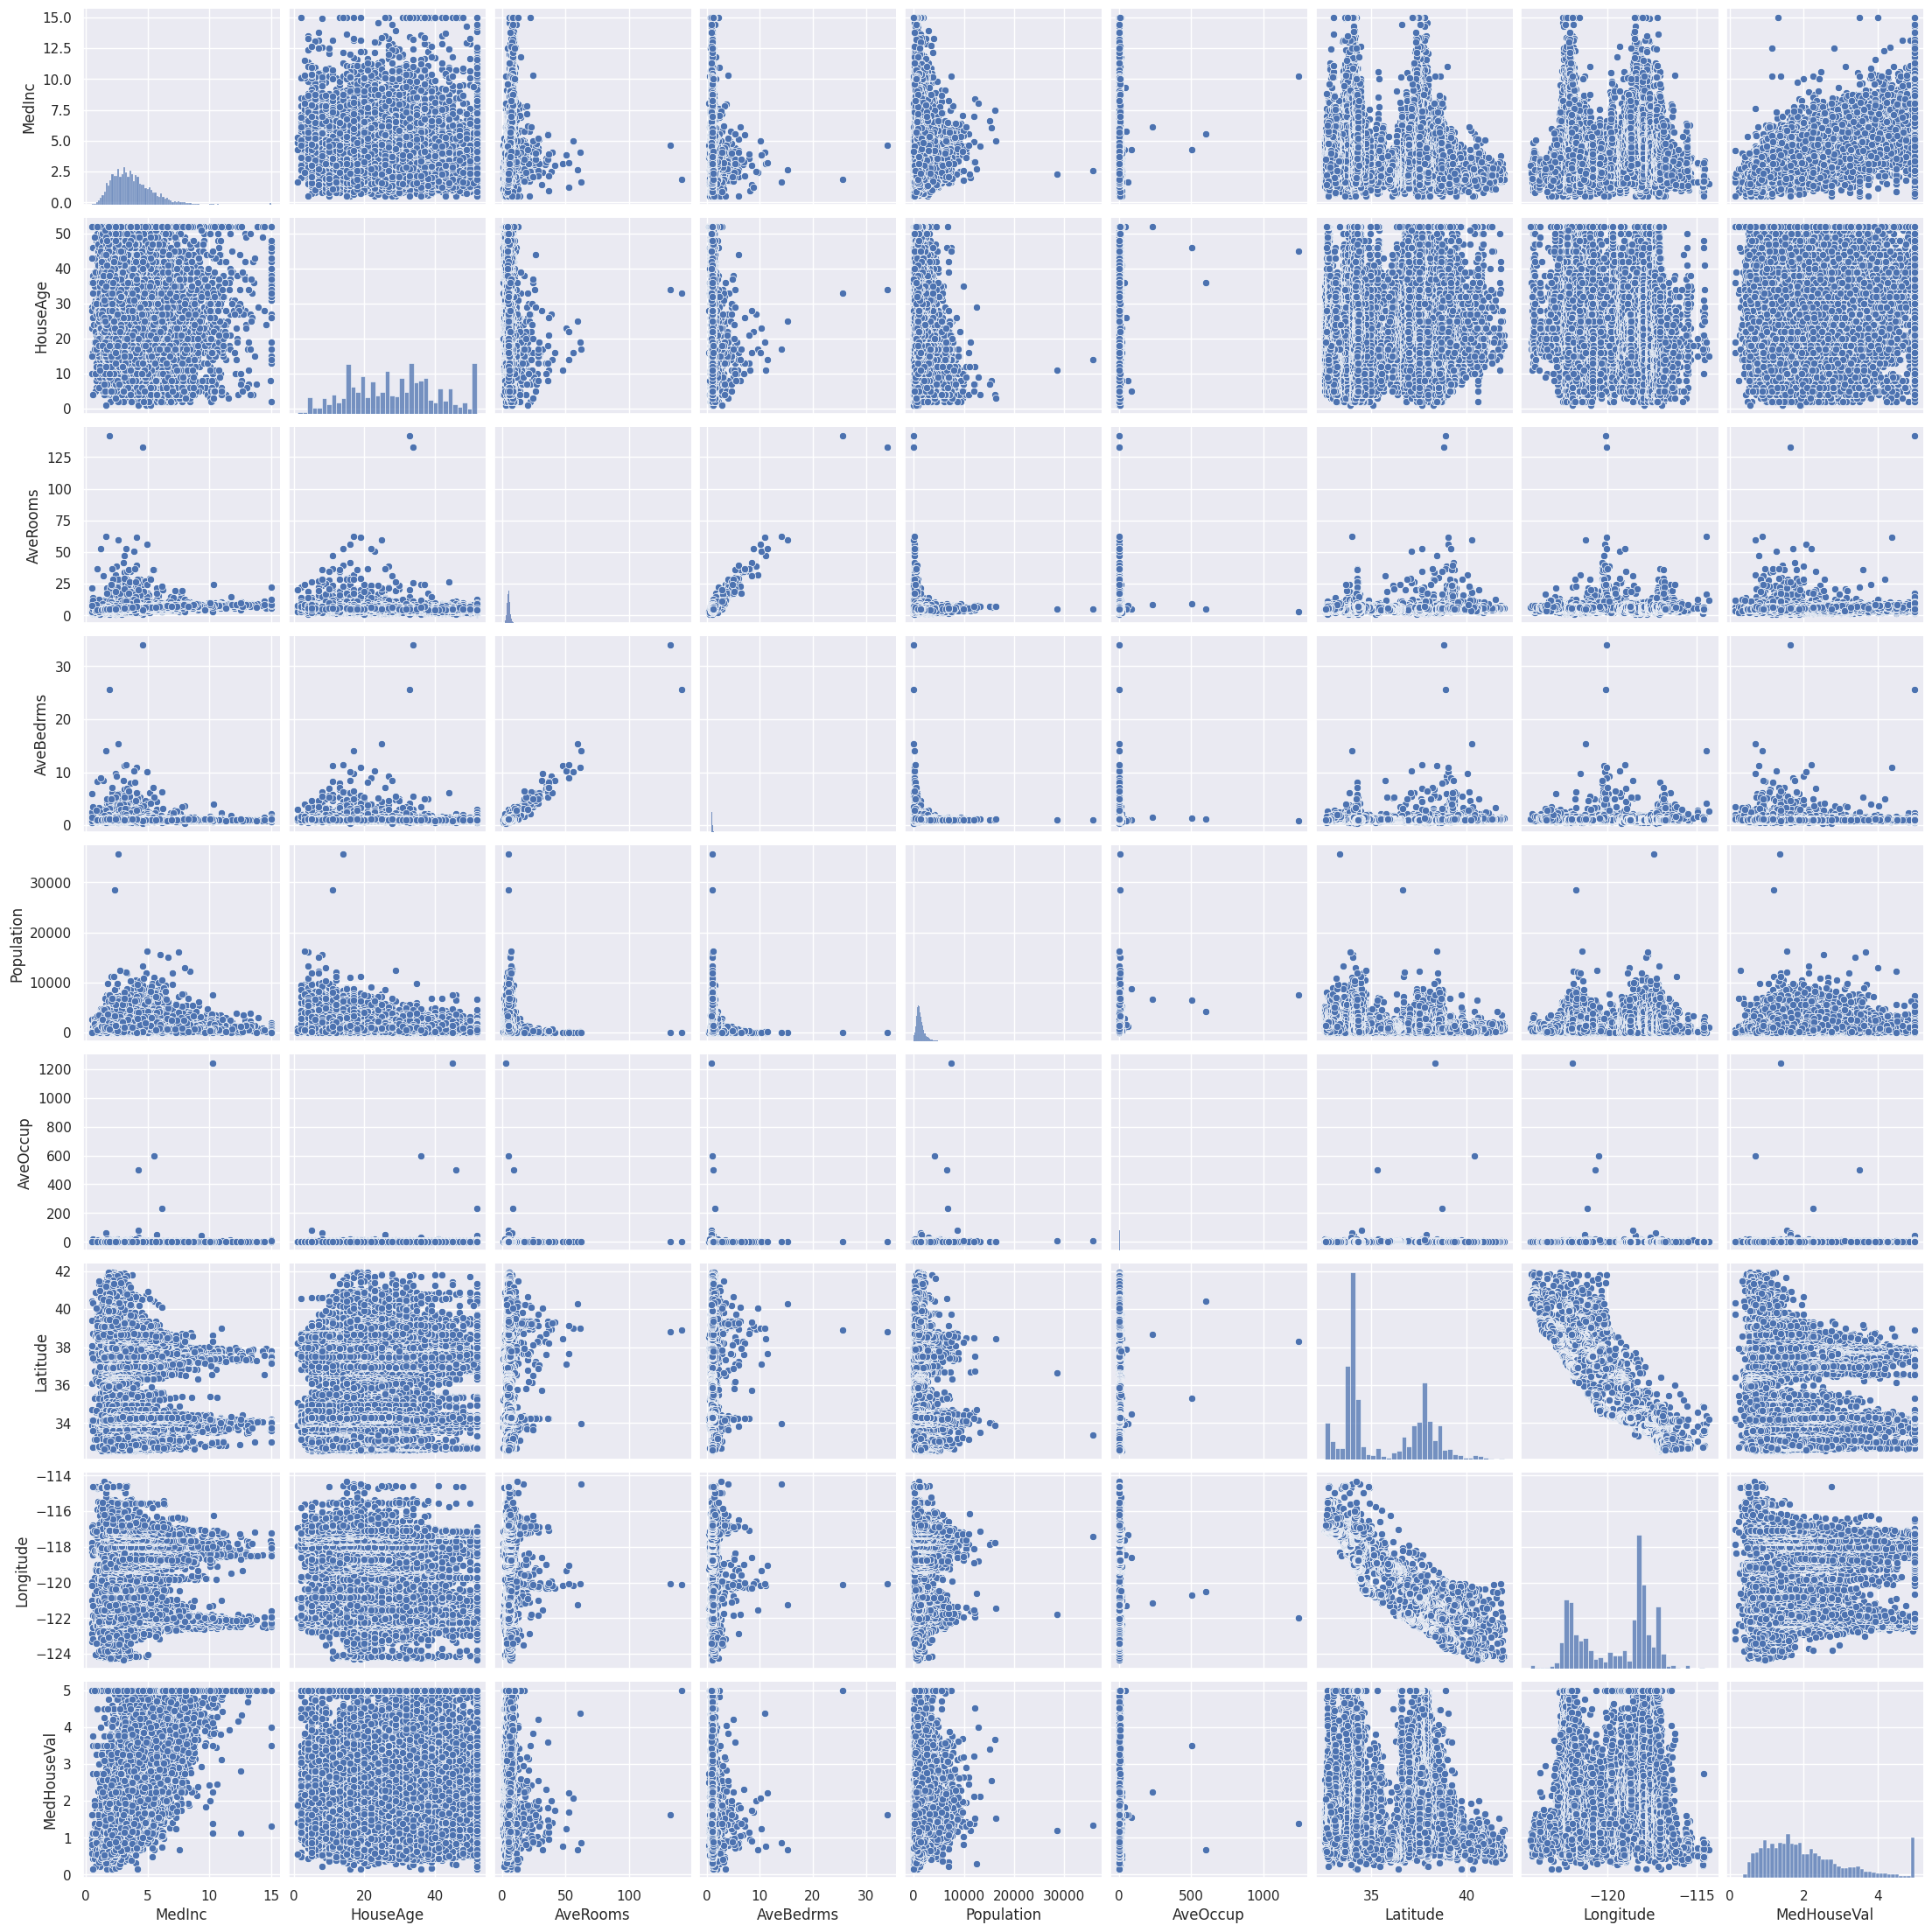

In [112]:
sns.pairplot(housing.frame)

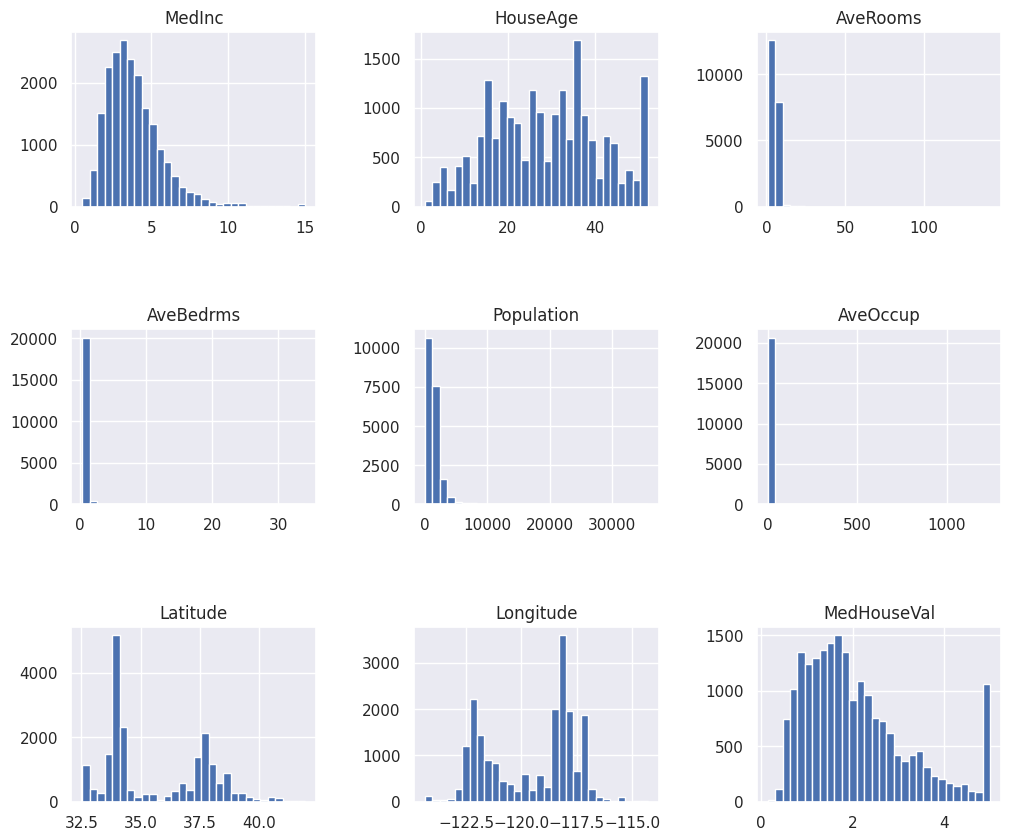

In [113]:
import matplotlib.pyplot as plt

housing.frame.hist(figsize=(12, 10), bins=30)
plt.subplots_adjust(hspace=0.7, wspace=0.4)

**Median income:** The salary of people is more or less normally distributed with few exceptions

**Average house age:** Distribution is more or less uniform.

**The target distribution:** More or less normally distributed.

For other feature such as the average rooms, average bedrooms, average occupation, and population there are very high and few values. Maybe they could be considered as outliers.

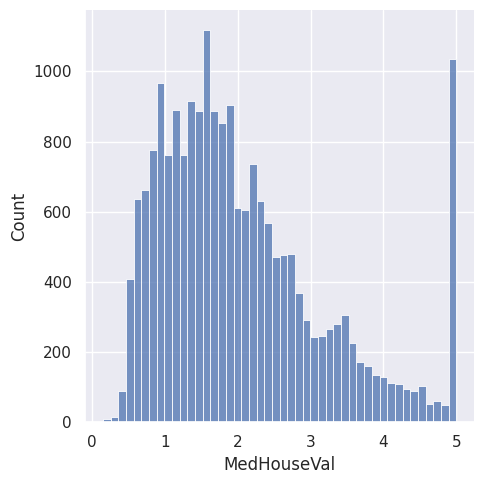

In [114]:
sns.displot(target)

<Axes: >

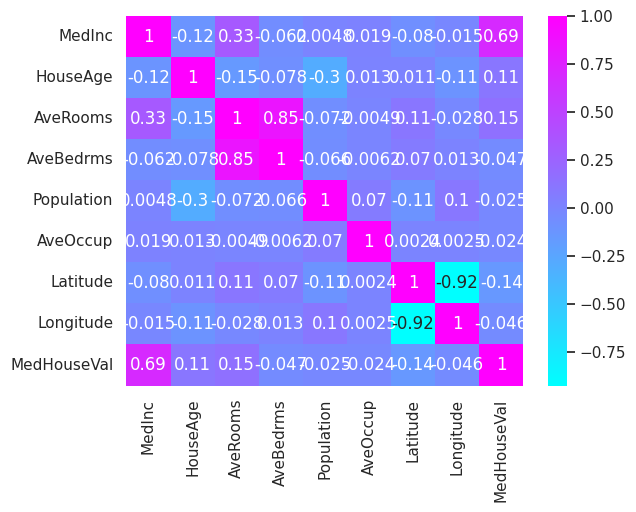

In [115]:
sns.heatmap(housing.frame.corr(),cmap='cool',annot=True)

In [116]:
housing.frame.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

Now looking at the statistics for features with extreme values as per the histograms.

In [117]:
imp_features = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
housing.frame[imp_features].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


We can see that there is a huge difference between 75% and max for every feature. This conclues that there are extreme values existing for these features.

## Calculating Z-score
In order to treat outliers we will use Z-score. We determine a threshold value for the Z-score, and data points with Z-scores beyond this threshold are considered potential outliers.

It is common to use -3 and +3 as threshold. Any data point with a z-score below -3 or above +3 are treated as outliers. The reason for this common threshold is that 99.7% of the values in a standard normal distribution fall between -3 and +3.

In [118]:
# Calculate the z-scores
z_scores = stats.zscore(housing.frame)

# Print the z-scores
z_scores

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


In [119]:
# Convert the z-scores to absolute values
abs_z_scores = np.abs(z_scores)

# Select data points with a z-scores above or below 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Filter the dataset
filtered_df = housing.frame[filtered_entries]

In [120]:
filtered_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the MedHouseVal column. 

### X and y arrays

In [121]:
# Separate the features and target variable
X_filtered = filtered_df.drop(columns=['MedHouseVal'])
y_filtered = filtered_df['MedHouseVal']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

In [124]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19968,1.9861,43.0,4.635417,0.972222,943.0,3.274306,36.21,-119.09
5764,2.9000,12.0,3.662848,1.116203,1882.0,3.080196,34.17,-118.29
3049,2.2071,34.0,5.717122,1.084367,1506.0,3.736973,35.49,-119.38
1292,3.5179,37.0,5.847036,1.084130,1351.0,2.583174,38.01,-121.80
2502,1.4038,12.0,3.835391,1.004115,1043.0,4.292181,36.76,-120.38
...,...,...,...,...,...,...,...,...
11738,1.7375,52.0,4.812030,1.056391,523.0,1.966165,38.90,-121.07
12494,1.2041,50.0,3.862605,1.156511,1223.0,1.461171,38.57,-121.47
5575,2.6491,5.0,4.482368,1.094458,2965.0,3.734257,33.84,-118.31
877,3.3008,26.0,4.177778,1.074747,1434.0,2.896970,37.55,-122.01


In [125]:
y_test

18042    5.00001
18723    1.51600
4161     1.52200
3808     2.02700
18038    5.00001
          ...   
8367     1.52800
9635     1.12500
12641    0.87000
16863    2.29100
2802     0.62400
Name: MedHouseVal, Length: 3959, dtype: float64

## Linear regression with stochastic gradient descent (SGD Regressor in sklearn)

In [126]:
# Create the SGDRegressor models
elastic_net_model = make_pipeline(StandardScaler(), SGDRegressor(penalty='elasticnet', random_state=42))
ridge_model = make_pipeline(StandardScaler(), SGDRegressor(penalty='l2', random_state=42))

# Perform K-fold cross-validation with K=5
k = 5
elastic_net_scores = cross_val_score(elastic_net_model, X_train, y_train, cv=k, scoring='r2')
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv=k, scoring='r2')

# Print the mean scores
print("Mean Accuracy (Elastic Net):", elastic_net_scores.mean())
print("Mean Accuracy (Ridge Regression):", ridge_scores.mean())

Mean Accuracy (Elastic Net): 0.6327884946203887
Mean Accuracy (Ridge Regression): 0.6327883886066451


## Conclusion

The output "Mean Accuracy (Elastic Net): 0.6327884946203887" and "Mean Accuracy (Ridge Regression): 0.6327883886066451" represent the mean accuracy (R-squared) scores obtained from performing K-fold cross-validation on the Elastic Net and Ridge Regression models, respectively.

R-squared is a statistical measure that represents the proportion of the variance in the target variable (dependent variable) that can be explained by the independent variables in the model.

In this case, the mean accuracy scores obtained for both the Elastic Net and Ridge Regression models are approximately 0.63. This suggests that these models explain around 63% of the variability in the target variable, based on the given features and the cross-validated evaluation.




